In [1]:
import numpy as np

In [2]:
from keras.models import Sequential

In [22]:
import numpy as np
from keras.models import Sequential
from keras.datasets import mnist
from keras.layers import Dense
from keras.layers import Input
from keras.layers import Dropout
from keras.utils import np_utils
import matplotlib.pyplot as plt

In [10]:
np.random.seed(15)

In [19]:
(X_train, y_train) , (X_test, y_test) = mnist.load_data()

In [8]:
X_train.shape

(60000, 28, 28)

In [9]:
y_train.shape

(60000,)

These are the sample training inputs: 



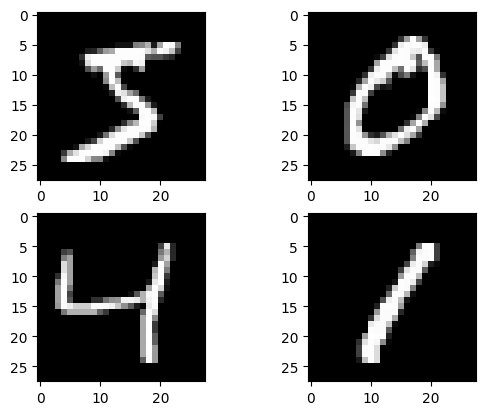

In [11]:
# print some samples of the dataset
print("These are the sample training inputs: \n")
plt.subplot(221)
plt.imshow(X_train[0], cmap = plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap = plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap = plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap = plt.get_cmap('gray'))

These are the sample test inputs: 



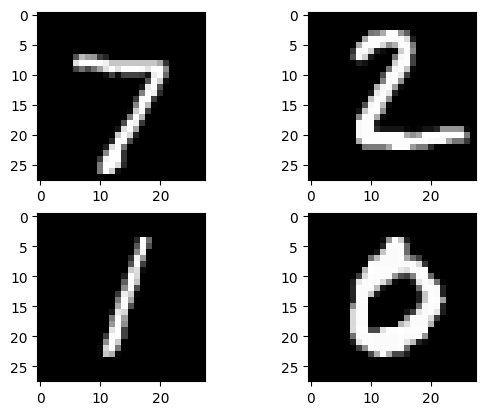

In [12]:
# print some test samples of the dataset
print("These are the sample test inputs: \n")
plt.subplot(221)
plt.imshow(X_test[0], cmap = plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_test[1], cmap = plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_test[2], cmap = plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_test[3], cmap = plt.get_cmap('gray'))

In [15]:
X_test[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [20]:
#flatten the pixels into 785 inputs instead of 28 * 28 pixels
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

In [24]:
y_train[0]

5

In [25]:
#onehot encode for outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [26]:
#normalize the input
X_train = X_train / 255
X_test = X_test / 255

In [21]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [28]:
def baseline_model(input_neurons, input_dim, activation, output_neurons, optimizer):
  model = Sequential()
  #input layer
  model.add(Dense(input_neurons, input_dim = input_dim, kernel_initializer="normal", activation = activation ))
  #hidden layer
  model.add(Dense(20,kernel_initializer="normal", activation = "relu"))
  #output layer
  model.add(Dense(output_neurons, kernel_initializer="normal", activation = "softmax"))
  #compile model
  model.compile(loss="categorical_crossentropy", optimizer = optimizer, metrics = ['accuracy'])

  return model

In [29]:
model = baseline_model(num_pixels, num_pixels, 'relu', num_classes, 'adam')

#fit the model
model.fit(X_train, y_train,validation_data = (X_test, y_test), batch_size = 200, epochs = 10, verbose = 2)

#evaluate the model
score = model.evaluate(X_test, y_test)

print(f"Baseline error: {score}")

Epoch 1/10
300/300 - 7s - loss: 0.4219 - accuracy: 0.8840 - val_loss: 0.1836 - val_accuracy: 0.9460 - 7s/epoch - 24ms/step
Epoch 2/10
300/300 - 6s - loss: 0.1515 - accuracy: 0.9565 - val_loss: 0.1151 - val_accuracy: 0.9659 - 6s/epoch - 18ms/step
Epoch 3/10
300/300 - 6s - loss: 0.1004 - accuracy: 0.9704 - val_loss: 0.0966 - val_accuracy: 0.9710 - 6s/epoch - 21ms/step
Epoch 4/10
300/300 - 5s - loss: 0.0720 - accuracy: 0.9788 - val_loss: 0.0811 - val_accuracy: 0.9745 - 5s/epoch - 18ms/step
Epoch 5/10
300/300 - 6s - loss: 0.0558 - accuracy: 0.9837 - val_loss: 0.0753 - val_accuracy: 0.9773 - 6s/epoch - 21ms/step
Epoch 6/10
300/300 - 6s - loss: 0.0414 - accuracy: 0.9879 - val_loss: 0.0666 - val_accuracy: 0.9783 - 6s/epoch - 18ms/step
Epoch 7/10
300/300 - 7s - loss: 0.0327 - accuracy: 0.9903 - val_loss: 0.0669 - val_accuracy: 0.9789 - 7s/epoch - 22ms/step
Epoch 8/10
300/300 - 6s - loss: 0.0254 - accuracy: 0.9932 - val_loss: 0.0647 - val_accuracy: 0.9808 - 6s/epoch - 18ms/step
Epoch 9/10
300/3

In [32]:
np.argmax(model.predict(X_test)[0])

313/313 [==============================] - 2s 6ms/step


7